In [1]:
import numpy as np
import matplotlib.pyplot as plt


HARD MARGIN

In [2]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Convert labels to {-1, 1}
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


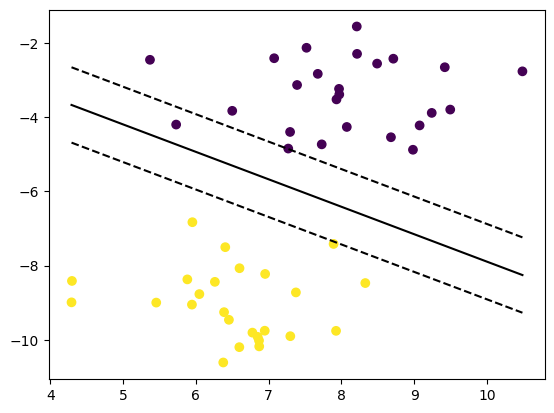

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # Convert to {-1, 1}

clf = SVM()
clf.fit(X, y)
predictions = clf.predict(X)

# Plot
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--")

    plt.show()

visualize_svm()


SOFT MARGIN


In [6]:
import numpy as np

class SoftMarginSVM:
    def __init__(self, learning_rate=0.001, C=1.0, n_iters=1000):
        self.lr = learning_rate
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    dw = self.w
                    db = 0
                else:
                    dw = self.w - self.C * y_[idx] * x_i
                    db = -self.C * y_[idx]

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)


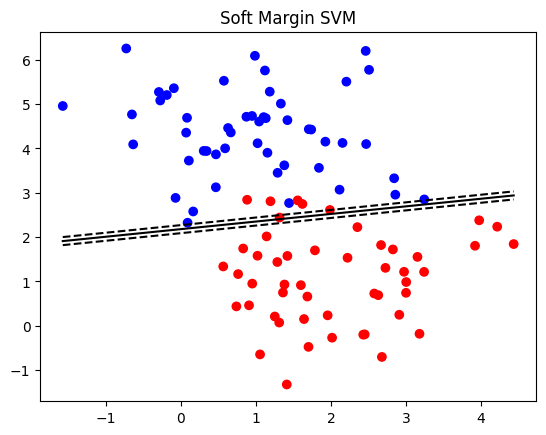

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate simple data
X, y = make_blobs(n_samples=100, centers=2, random_state=0)
y = np.where(y == 0, -1, 1)

model = SoftMarginSVM(learning_rate=0.001, C=1000, n_iters=1000)
model.fit(X, y)
predictions = model.predict(X)

# Visualization
def plot_decision_boundary(X, y, model):
    def get_line(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    x_min, x_max = np.amin(X[:, 0]), np.amax(X[:, 0])
    y_min = get_line(x_min, model.w, model.b, 0)
    y_max = get_line(x_max, model.w, model.b, 0)
    plt.plot([x_min, x_max], [y_min, y_max], 'k-')  # decision boundary

    y_min = get_line(x_min, model.w, model.b, 1)
    y_max = get_line(x_max, model.w, model.b, 1)
    plt.plot([x_min, x_max], [y_min, y_max], 'k--')  # margin +

    y_min = get_line(x_min, model.w, model.b, -1)
    y_max = get_line(x_max, model.w, model.b, -1)
    plt.plot([x_min, x_max], [y_min, y_max], 'k--')  # margin -

    plt.title("Soft Margin SVM")
    plt.show()

plot_decision_boundary(X, y, model)
